# Devices Price Classification System using Python and Spring Boot
This notebook aims to explore the data and find insights in order to gain an insight on the provided data and it will also try to build a classification model based on the explored data


The data consists of 22 columns which are:

* `id` - ID
* `battery_power` - Total energy a battery can store in one time measured in mAh
* `blue` - Has Bluetooth or not
* `clock_speed` - The speed at which the microprocessor executes instructions
* `dual_sim` - Has dual sim support or not
* `fc` - Front Camera megapixels
* `four_g` - Has 4G or not
* `int_memory` - Internal Memory in Gigabytes
* `m_dep` - Mobile Depth in cm
* `mobile_wt` - Weight of mobile phone
* `n_cores` - Number of cores of the processor
* `pc` - Primary Camera megapixels
* `px_height` - Pixel Resolution Height
* `px_width` - Pixel Resolution Width
* `ram` - Random Access Memory in Megabytes
* `sc_h` - Screen Height of mobile in cm
* `sc_w` - Screen Width of mobile in cm
* `talk_time` - longest time that a single battery charge will last when you are
* `three_g` - Has 3G or not
* `touch_screen` - Has touch screen or not
* `wifi` - Has wifi or not
* `price_range` - This is the target variable with the value of:
    * 0 (low cost)

    * 1 (medium cost)
    * 2 (high cost)
    * 3 (very high cost)

The following notebook will be divided into two sections:
**Section 1** will explore the data and suggest some data engineering on features if appropriate

**Section 2** will model and try to get the best model from the data

## Section 1 Exploratory Data Analysis

Firstly the train dataset will be downloaded from the following [link](https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722). The test dataset will be downloaded after the model has finished training to ensure that the model is not overfitting

In [1]:
!gdown https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722 -O train.xlsx

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722
From (redirected): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=xlsx
To: /content/train.xlsx
174kB [00:00, 96.2MB/s]


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("train.xlsx")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


Checking the missing values in the data

In [3]:
df.isna().sum()/len(df) *100

battery_power    0.00
blue             0.00
clock_speed      0.00
dual_sim         0.00
fc               0.25
four_g           0.25
int_memory       0.25
m_dep            0.25
mobile_wt        0.20
n_cores          0.20
pc               0.25
px_height        0.20
px_width         0.10
ram              0.10
sc_h             0.05
sc_w             0.05
talk_time        0.00
three_g          0.00
touch_screen     0.00
wifi             0.00
price_range      0.00
dtype: float64

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### 1.1 The distrubition of the labels

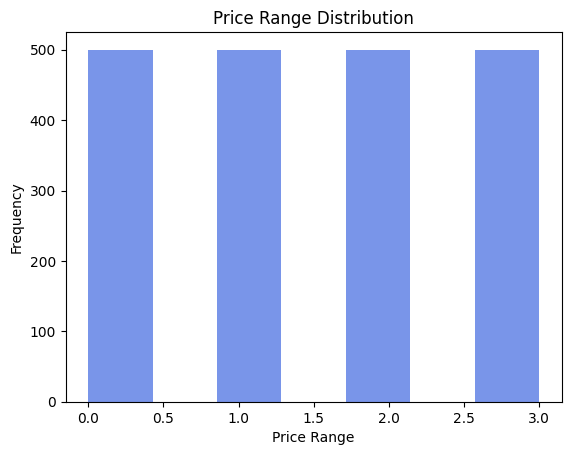

In [6]:
plt.hist(df["price_range"], bins=7, color='royalblue', alpha=0.7)
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.show()

The data is perfectly distributed

### 1.2 The effect of the screen area on the price Range

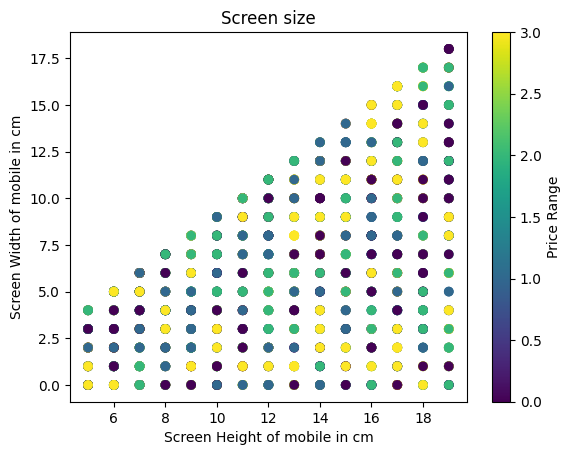

In [5]:
plt.scatter(df["sc_h"], df["sc_w"], c=df["price_range"], cmap="viridis")
plt.xlabel("Screen Height of mobile in cm")  # Customize labels based on your data
plt.ylabel("Screen Width of mobile in cm")
plt.title("Screen size")
plt.colorbar(label="Price Range")
plt.show()

So the size of the screen does not have an effect on the range of the price

### 1.3 The effect of the number of cores on the price range

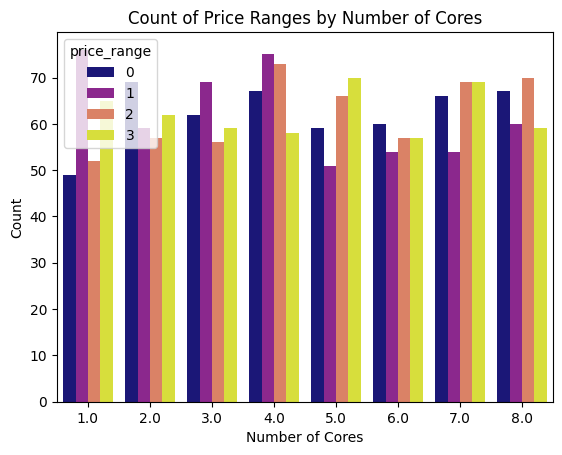

In [80]:
import seaborn as sns

sns.countplot(x="n_cores", hue="price_range", data=df, palette="plasma")
plt.xlabel("Number of Cores")
plt.ylabel("Count")
plt.title("Count of Price Ranges by Number of Cores")
plt.show()

The number of cores is not a dominant feature

### 1.4 The effect on the battery power on the price range

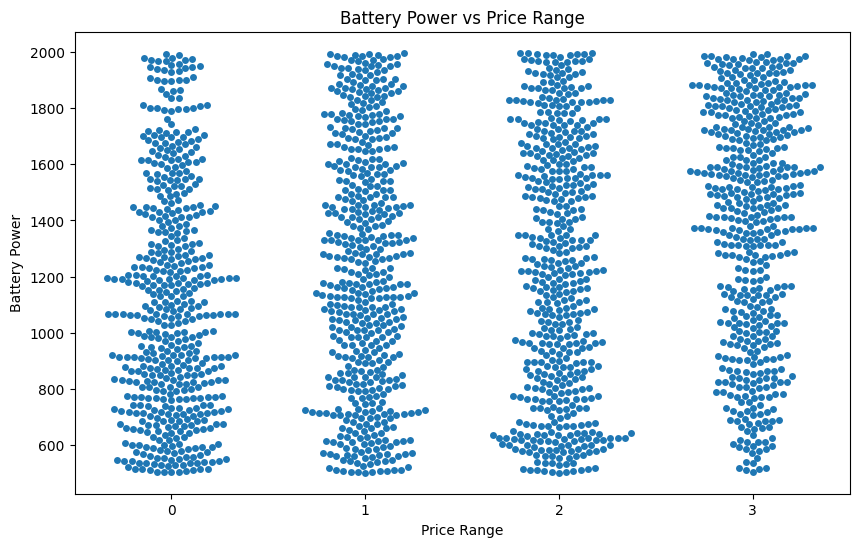

In [8]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="price_range", y="battery_power", data=df)
plt.title("Battery Power vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Battery Power")
plt.show()


The battery power is not a dominant feature

### 1.5 The effect of the RAM size on the price range

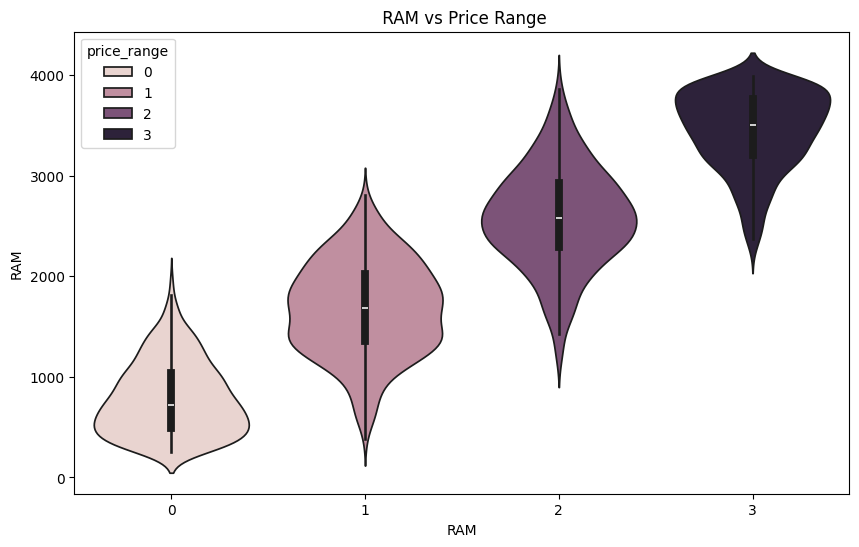

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="price_range", y="ram",hue="price_range", data=df)
plt.title(" RAM vs Price Range")
plt.xlabel("RAM")
plt.ylabel("RAM")
plt.show()


The RAM is a good indicator for the price

### 1.6 The effect of the bluetooth on the price

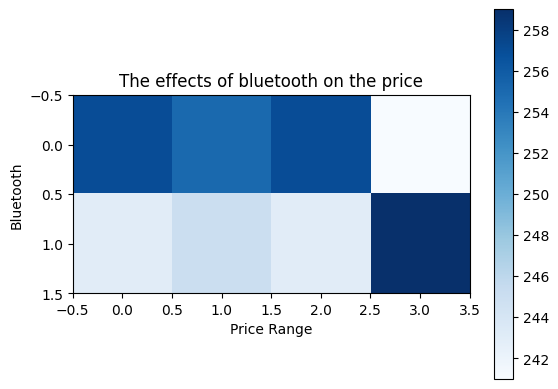

In [85]:
cm = pd.crosstab(df["blue"],df["price_range"])
plt.imshow(cm,cmap="Blues")
plt.title("The effects of bluetooth on the price")
plt.xlabel("Price Range")
plt.ylabel("Bluetooth")
plt.colorbar()
plt.show()

The Bluetooth is not a good indicator  
### 1.7 The effect of clock speed on the price

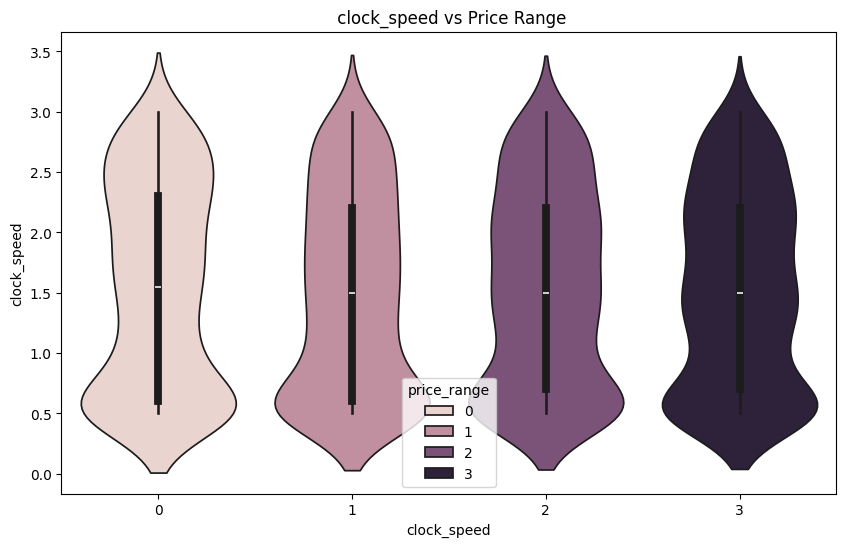

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="price_range", y="clock_speed",hue="price_range", data=df)
plt.title(" clock_speed vs Price Range")
plt.xlabel("clock_speed")
plt.ylabel("clock_speed")
plt.show()


The clock speed is not a good indicator
### 1.8 Talk time effect on the price

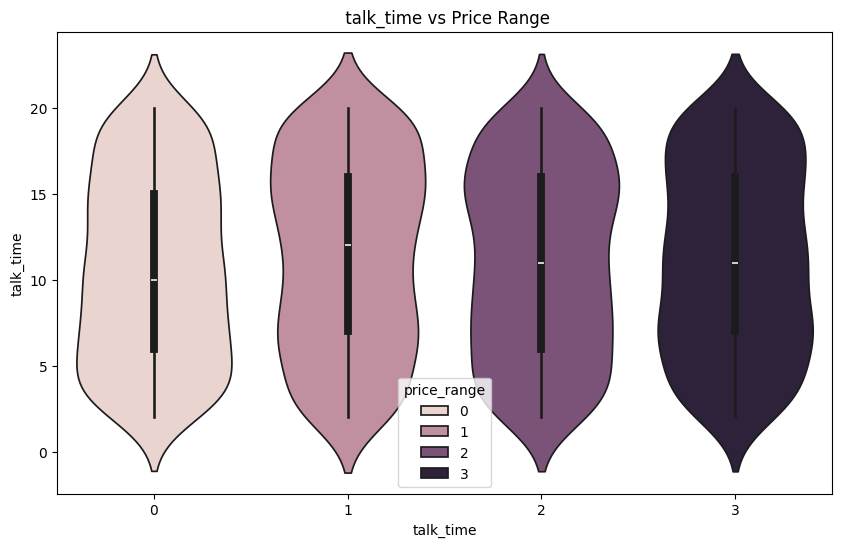

In [81]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="price_range", y="talk_time",hue="price_range", data=df)
plt.title(" talk_time vs Price Range")
plt.xlabel("talk_time")
plt.ylabel("talk_time")
plt.show()


Talk time is not a good indicator
### 1.9 The effect of three G on the price

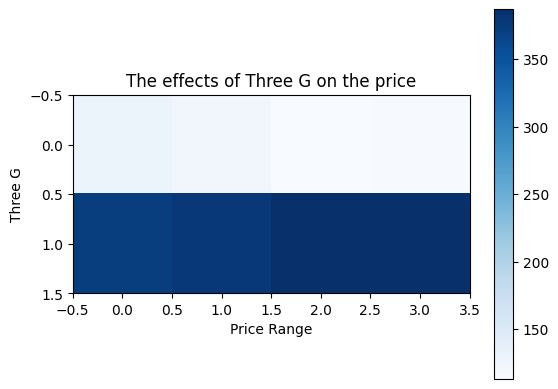

In [86]:
cm = pd.crosstab(df["three_g"],df["price_range"])
plt.imshow(cm,cmap="Blues")
plt.title("The effects of Three G on the price")
plt.xlabel("Price Range")
plt.ylabel("Three G")
plt.colorbar();

Thee g is not a good indicato
### 1.10 The effect of WiFi on the price

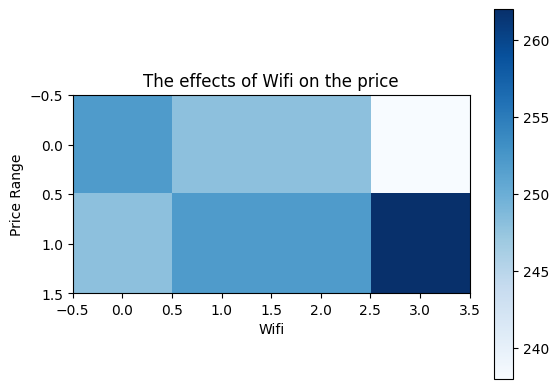

In [16]:
cm = pd.crosstab(df["wifi"],df["price_range"])
plt.imshow(cm,cmap="Blues")
plt.title("The effects of Wifi on the price")
plt.xlabel("Wifi")
plt.ylabel("Price Range")
plt.colorbar();

In [18]:
corr_matrix = df.corr(numeric_only=True)
range_corr = corr_matrix["price_range"].sort_values(ascending=False)

range_corr

price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

### 1.11 Conclusion:
There doesn't seem to be a dominant feature other than the RAM.




Some feature engineering could be implmented such as screen area which would be the screen height mulitplied by the screen width, pixel density which is the pixel width multiplied by the pixel height divided by the screen area also the battery efficiency which is talk time divided by battery life these features will be implemnted as an improvment on the base line model to check their effects   
- screen_area (sc_h * sc_w)
- pixel_density (px_width * px_height / screen_area)
- battery_efficiency (talk_time / battery_power)
- camera_res (fc * pc)



## Section 2 Modelling

### 2.1 Preprocessing

For preprocessing the following steps will be taken

1. The numerical values will be sperated from the categorical values
2. A sci-kit learn `pipleine` will be created that will:
    1.  Fill the missing numerical values with the median and the missing categorical values with the most frequent number
    2. One hot encode the numerical values   

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


np.random.seed(21)
X = df.drop("price_range",axis=1)
y = df["price_range"]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train.value_counts()/len(y_train)}")
print(f"Train distrubistion {y_val.value_counts()/len(y_val)}")
# Assuming 'data' is your DataFrame containing the dataset

# Define the numerical and categorical features
categorical_features = ["blue","dual_sim","four_g","n_cores","three_g",
                        "touch_screen","wifi"]
numerical_features = list(set(X.columns)-set(categorical_features))

# Create a pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

# Create a pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)



Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


**Note:** For baseline model the following models will be tried
1. KNN
2. SVM
3. Logistic Regression
4. Decision Tree
5. Random Forest Classifier

In [90]:
from sklearn.base import ClassifierMixin
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report


def evaluate_model(model,x_val,y_val):
    """
    A helper function to evaluate the model it prints the classification report
    which evaluates the precision, recall and accuracy for the provided model
    It also prints the confusion matrix of the model for more calrity

    Args:
        model: a model trained from the scikit library
        x_val: a numpy array of the features
        y_val: a numpy array of the target variable
    """
    y_preds = model.predict(x_val)

    print(classification_report(y_val,y_preds))
    cf = confusion_matrix(y_val,y_preds)
    disp = ConfusionMatrixDisplay(cf)
    disp.plot()
    plt.show()



def train_model(model:ClassifierMixin,X_train:np.ndarray,
                y_train:np.ndarray,X_test:np.ndarray,y_test:np.ndarray)->None:
    """
    Trains an initalized model with its hyperparameters

    Args:
        model: A scikit model to be trained
        X_train: A numpy array of the training features
        y_train: A numpy array of the training labels
        X_test: A numpy array of the test features
        y_test: A nump array of the test labels

    Returns:
        A scikit model that has been trained
    """

    model.fit(X_train,y_train)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    print(f"---{model}---")
    print(f"Training accuracy {train_acc*100}%")
    print(f"Training accuracy {test_acc*100}%")



### 2.2 KNN

---KNeighborsClassifier(n_neighbors=50)---
Training accuracy 70.9375%
Training accuracy 67.25%
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       120
           1       0.51      0.62      0.56        95
           2       0.53      0.64      0.58        90
           3       0.89      0.67      0.77        95

    accuracy                           0.67       400
   macro avg       0.70      0.67      0.67       400
weighted avg       0.71      0.67      0.68       400



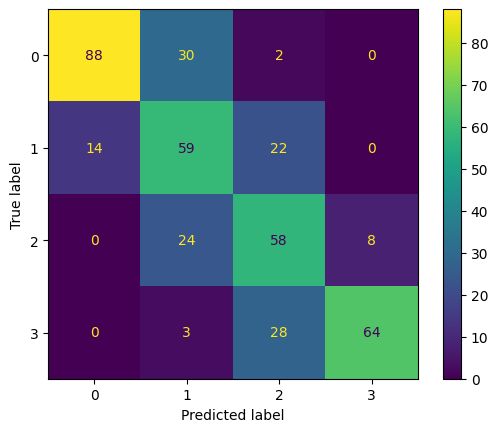

In [91]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier(n_neighbors=50)
train_model(knn,X_train,y_train,X_val,y_val)
evaluate_model(knn,X_val,y_val)

---KNeighborsClassifier(n_neighbors=100)---
Training accuracy 71.125%
Training accuracy 66.25%
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       120
           1       0.53      0.61      0.57        95
           2       0.50      0.63      0.56        90
           3       0.85      0.64      0.73        95

    accuracy                           0.66       400
   macro avg       0.68      0.66      0.66       400
weighted avg       0.70      0.66      0.67       400



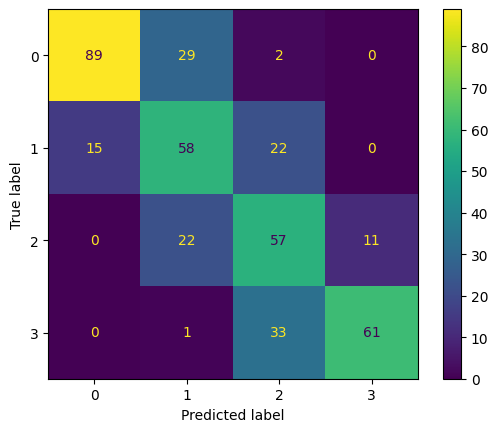

In [92]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier(n_neighbors=100)
train_model(knn,X_train,y_train,X_val,y_val)
evaluate_model(knn,X_val,y_val)

### 2.3 SVM

---SVC(gamma=2.5, kernel='linear')---
Training accuracy 97.5%
Training accuracy 95.75%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.95      0.94      0.94        95
           2       0.93      0.92      0.93        90
           3       0.95      0.99      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



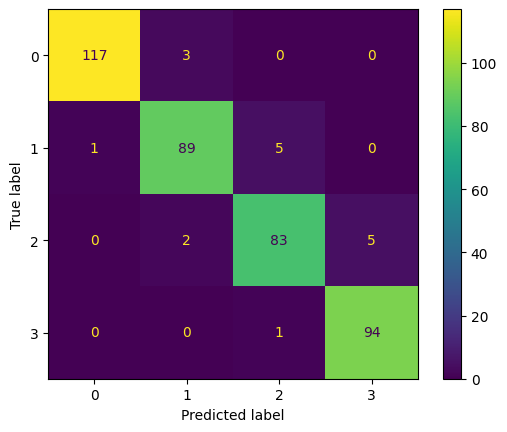

In [93]:
from sklearn.svm import SVC


svc = SVC(C=1.0,kernel = "linear",gamma =2.5)
train_model(svc,X_train,y_train,X_val,y_val)
evaluate_model(svc,X_val,y_val)

---SVC(C=10, gamma=0.5, kernel='linear')---
Training accuracy 98.625%
Training accuracy 97.0%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.95      0.96        95
           2       0.93      0.94      0.94        90
           3       0.97      0.99      0.98        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



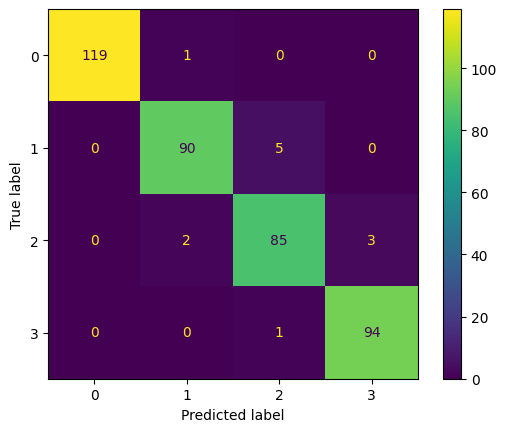

In [94]:
svc = SVC(C=10,kernel = 'linear',gamma =0.5)
train_model(svc,X_train,y_train,X_val,y_val)
evaluate_model(svc,X_val,y_val)

### 3.4 Decision Tree

---DecisionTreeClassifier(max_depth=5)---
Training accuracy 88.3125%
Training accuracy 83.75%


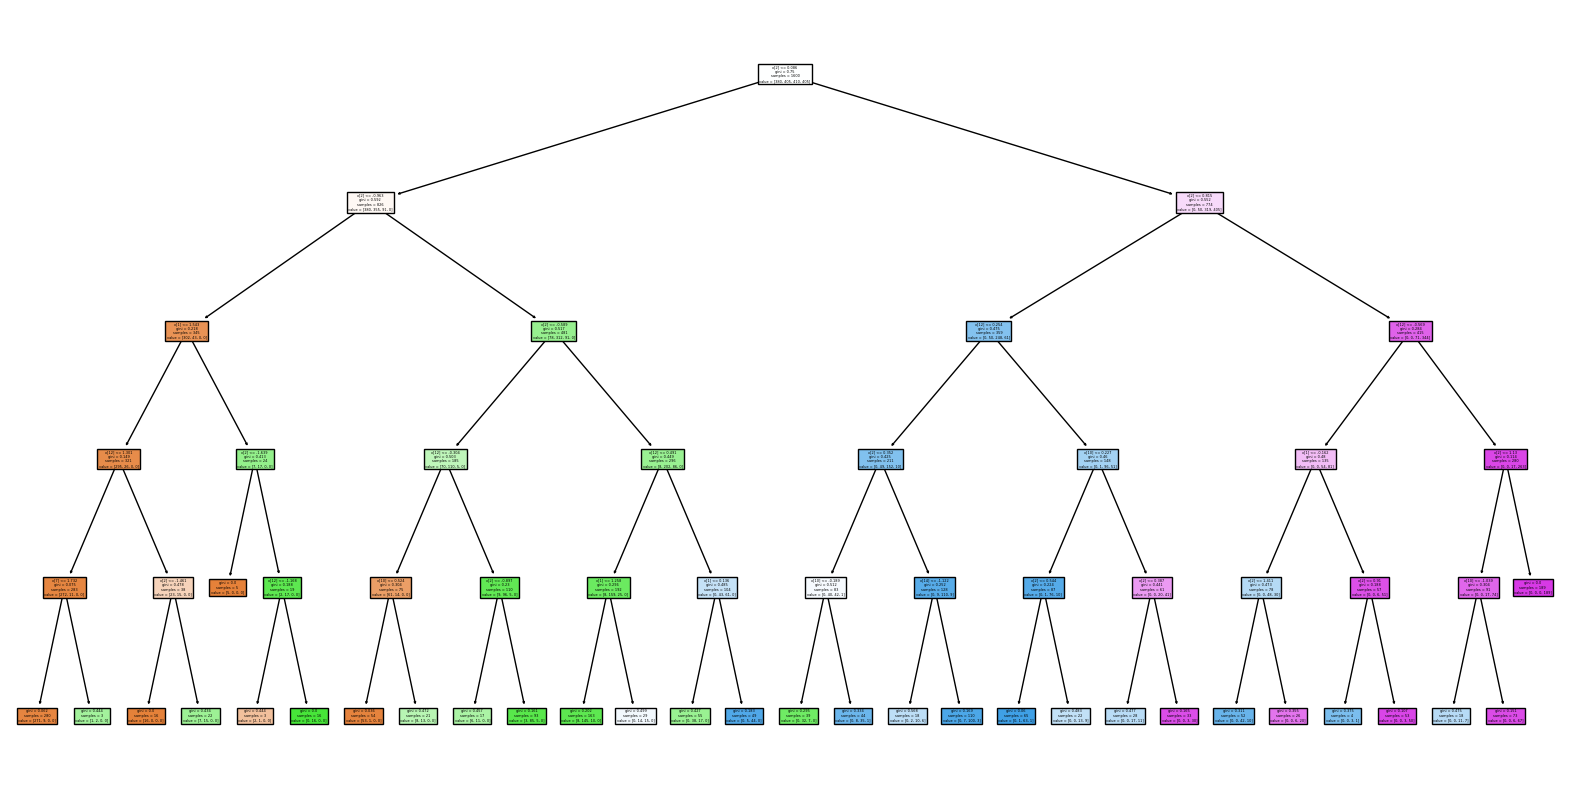

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree_clf=DecisionTreeClassifier(max_depth =5)

train_model(tree_clf,X_train,y_train,X_val,y_val)
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       120
           1       0.72      0.83      0.77        95
           2       0.78      0.81      0.80        90
           3       0.91      0.89      0.90        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



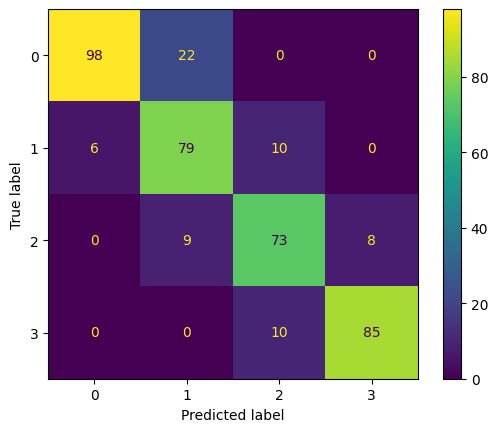

In [96]:
evaluate_model(tree_clf,X_val,y_val)

### 3.5 Random Forest

---RandomForestClassifier(max_depth=8)---
Training accuracy 99.25%
Training accuracy 84.75%
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       120
           1       0.77      0.82      0.80        95
           2       0.75      0.74      0.75        90
           3       0.88      0.91      0.89        95

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



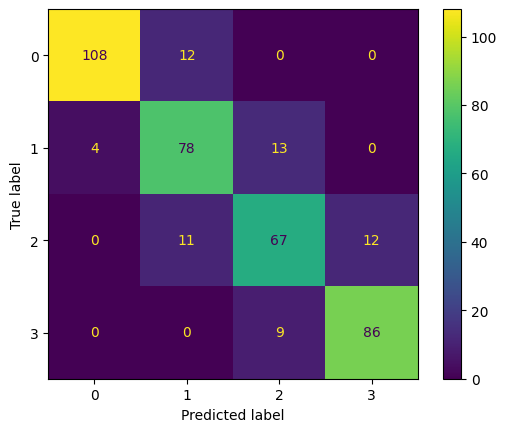

In [97]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

forest_clf = RandomForestClassifier( max_depth=8, n_estimators=100)
train_model(forest_clf,X_train,y_train,X_val,y_val)
evaluate_model(forest_clf,X_val,y_val)

### 3.6 Logistic Regression

---LogisticRegression(solver='liblinear')---
Training accuracy 85.3125%
Training accuracy 83.0%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       120
           1       0.73      0.67      0.70        95
           2       0.67      0.63      0.65        90
           3       0.89      0.98      0.93        95

    accuracy                           0.83       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.83      0.83       400



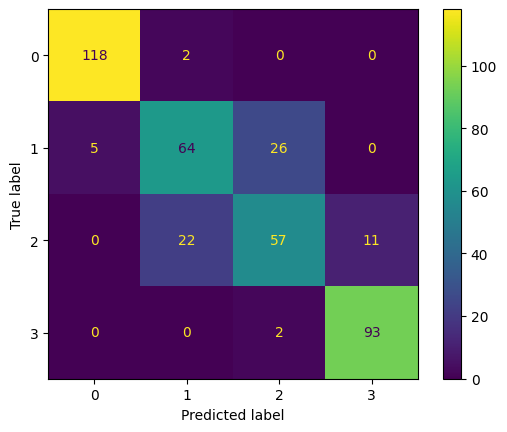

In [98]:
from sklearn.linear_model import LogisticRegression

# create an instance of LogisticRegression class
log_clf = LogisticRegression(solver='liblinear')
train_model(log_clf,X_train,y_train,X_val,y_val)
evaluate_model(log_clf,X_val,y_val)

Since the SVM  gave the best results it will be furhter fine-tuned using two approaches first the data will be entered as is to the model with randmoized search then grid search will be applied
After that the feature engineering steps will be tried

### 3.7 Hyperparameter tuning using Randomized Search

In [119]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


svm_parameters = {
    'C': np.logspace(-2, 2, 500),
    'kernel': ['linear', 'rbf', 'poly'],  # Changed 'polynomial' to 'poly'
    'gamma': np.logspace(-3, 3, 500),
    'degree': np.arange(1,9),  # Specify the degree for the polynomial kernel
    "probability": [True]
}


random_svm = SVC()

# Use RandomizedSearchCV to search for best hyperparameters
clf = RandomizedSearchCV(random_svm, svm_parameters, random_state=21,
                         refit = True, cv=3,  verbose=3,n_iter=400,n_jobs=-1)
search = clf.fit(X_train, y_train)
search.best_params_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
CPU times: user 10.4 s, sys: 1.63 s, total: 12.1 s
Wall time: 9min 21s


{'probability': True,
 'kernel': 'linear',
 'gamma': 87.47496301554415,
 'degree': 2,
 'C': 51.45443878390925}

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.96      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



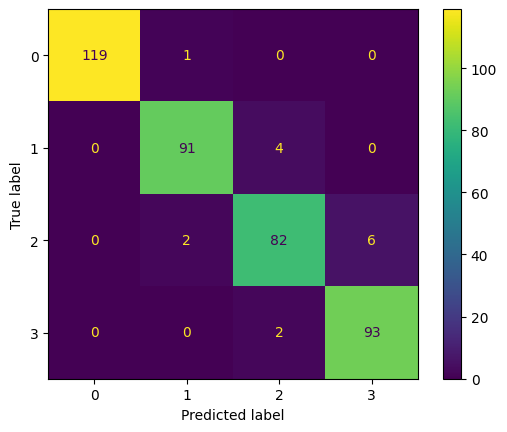

In [120]:
evaluate_model(clf.best_estimator_,X_val,y_val)

### 3.8 Hyperparameter tuning using Grid Search

In [121]:
%%time
from sklearn.model_selection import GridSearchCV


grid_params = {
    'C': np.logspace(1.7, 2, 10),
    'kernel': ['linear'],  # Changed 'polynomial' to 'poly'
    'gamma': np.logspace(1.9, 2, 10),
    'degree': [2,3, 4],  # Specify the degree for the polynomial kernel
    "probability": [True]
}


grid_clf = GridSearchCV(SVC(), grid_params, cv = 3, scoring='accuracy',verbose=3,n_jobs=-1)

grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)

print(grid_clf.best_score_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'C': 58.434141337351754, 'degree': 2, 'gamma': 79.43282347242814, 'kernel': 'linear', 'probability': True}
0.955617157727325
CPU times: user 11.1 s, sys: 1.62 s, total: 12.8 s
Wall time: 12min 45s


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.96      0.96      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



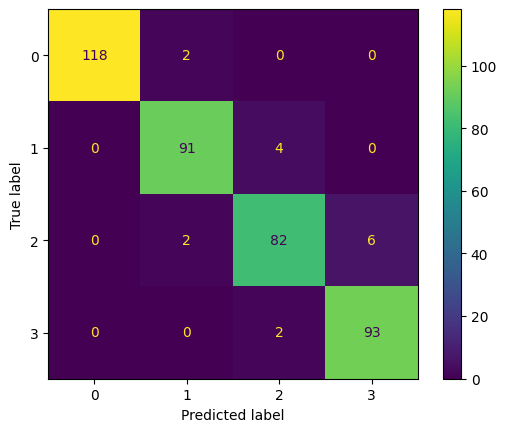

In [122]:
evaluate_model(grid_clf.best_estimator_,X_val,y_val)

## Section 3: Adding new features

In [106]:
df['battery_efficiency'] = df['talk_time'] / df['battery_power']

df['camera_res'] = df['fc'] * df['pc']

np.random.seed(21)
X_f = df.drop("price_range",axis=1)
y = df["price_range"]

X_train_f,X_val_f,y_train_f,y_val_f = train_test_split(X_f,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train_f.value_counts()/len(y_train_f)}")
print(f"Train distrubistion {y_val_f.value_counts()/len(y_val_f)}")
# Assuming 'data' is your DataFrame containing the dataset

# Define the numerical and categorical features
categorical_features = ["blue","dual_sim","four_g","n_cores","three_g",
                        "touch_screen","wifi"]
numerical_features = list(set(X.columns)-set(categorical_features))

# Create a pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

# Create a pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

# Combine the pipelines using ColumnTransformer
preprocessor_f = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

# Fit and transform the data using the preprocessor pipeline
X_train_f = preprocessor_f.fit_transform(X_train_f)
X_val_f = preprocessor_f.transform(X_val_f)



Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


### 3.1 KNN

---KNeighborsClassifier(n_neighbors=50)---
Training accuracy 70.9375%
Training accuracy 67.25%
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       120
           1       0.51      0.62      0.56        95
           2       0.53      0.64      0.58        90
           3       0.89      0.67      0.77        95

    accuracy                           0.67       400
   macro avg       0.70      0.67      0.67       400
weighted avg       0.71      0.67      0.68       400



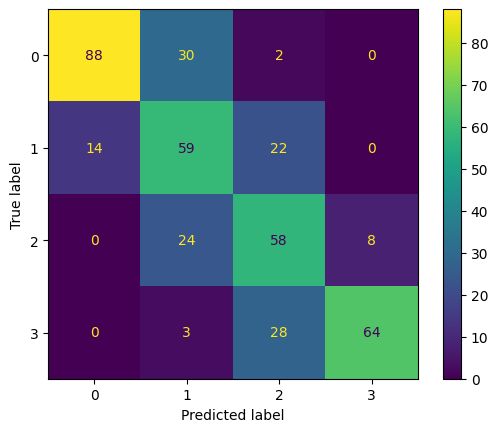

In [101]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn_f = KNeighborsClassifier(n_neighbors=50)
train_model(knn_f,X_train_f,y_train_f,X_val_f,y_val_f)
evaluate_model(knn_f,X_val_f,y_val_f)

---KNeighborsClassifier(n_neighbors=100)---
Training accuracy 71.125%
Training accuracy 66.25%
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       120
           1       0.53      0.61      0.57        95
           2       0.50      0.63      0.56        90
           3       0.85      0.64      0.73        95

    accuracy                           0.66       400
   macro avg       0.68      0.66      0.66       400
weighted avg       0.70      0.66      0.67       400



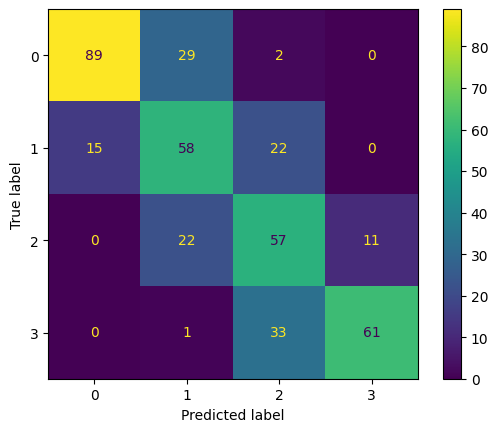

In [102]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn_f = KNeighborsClassifier(n_neighbors=100)
train_model(knn_f,X_train_f,y_train_f,X_val_f,y_val_f)
evaluate_model(knn_f,X_val_f,y_val_f)

### 3.2 SVM

---SVC(gamma=2.5, kernel='linear')---
Training accuracy 97.5%
Training accuracy 95.75%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.95      0.94      0.94        95
           2       0.93      0.92      0.93        90
           3       0.95      0.99      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



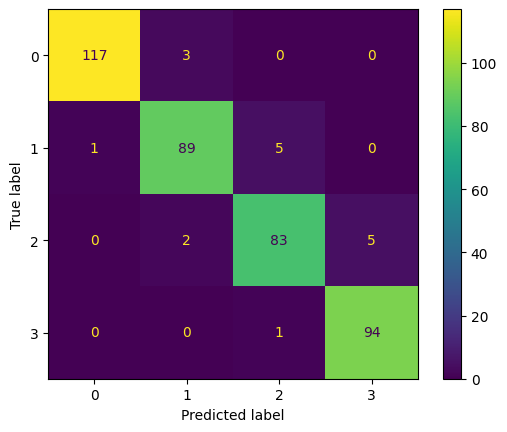

In [103]:
from sklearn.svm import SVC


svc_f = SVC(C=1.0,kernel = "linear",gamma =2.5)
train_model(svc_f,X_train_f,y_train_f,X_val_f,y_val_f)
evaluate_model(svc_f,X_val_f,y_val_f)

---SVC(C=10, gamma=0.5, kernel='linear')---
Training accuracy 98.625%
Training accuracy 97.0%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.95      0.96        95
           2       0.93      0.94      0.94        90
           3       0.97      0.99      0.98        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



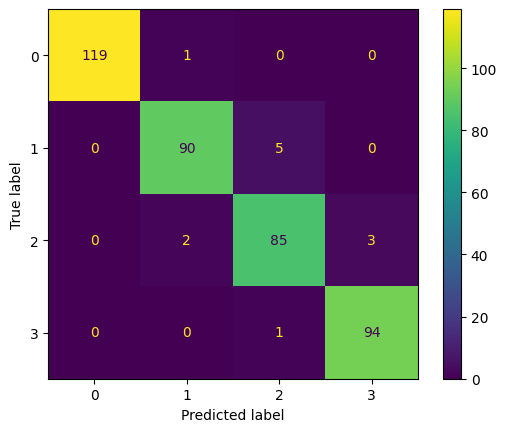

In [104]:
svc_f = SVC(C=10,kernel = 'linear',gamma =0.5)
train_model(svc_f,X_train_f,y_train_f,X_val_f,y_val_f)
evaluate_model(svc_f,X_val_f,y_val_f)

### 3.3 Decision Tree

---DecisionTreeClassifier(max_depth=5)---
Training accuracy 88.3125%
Training accuracy 83.75%


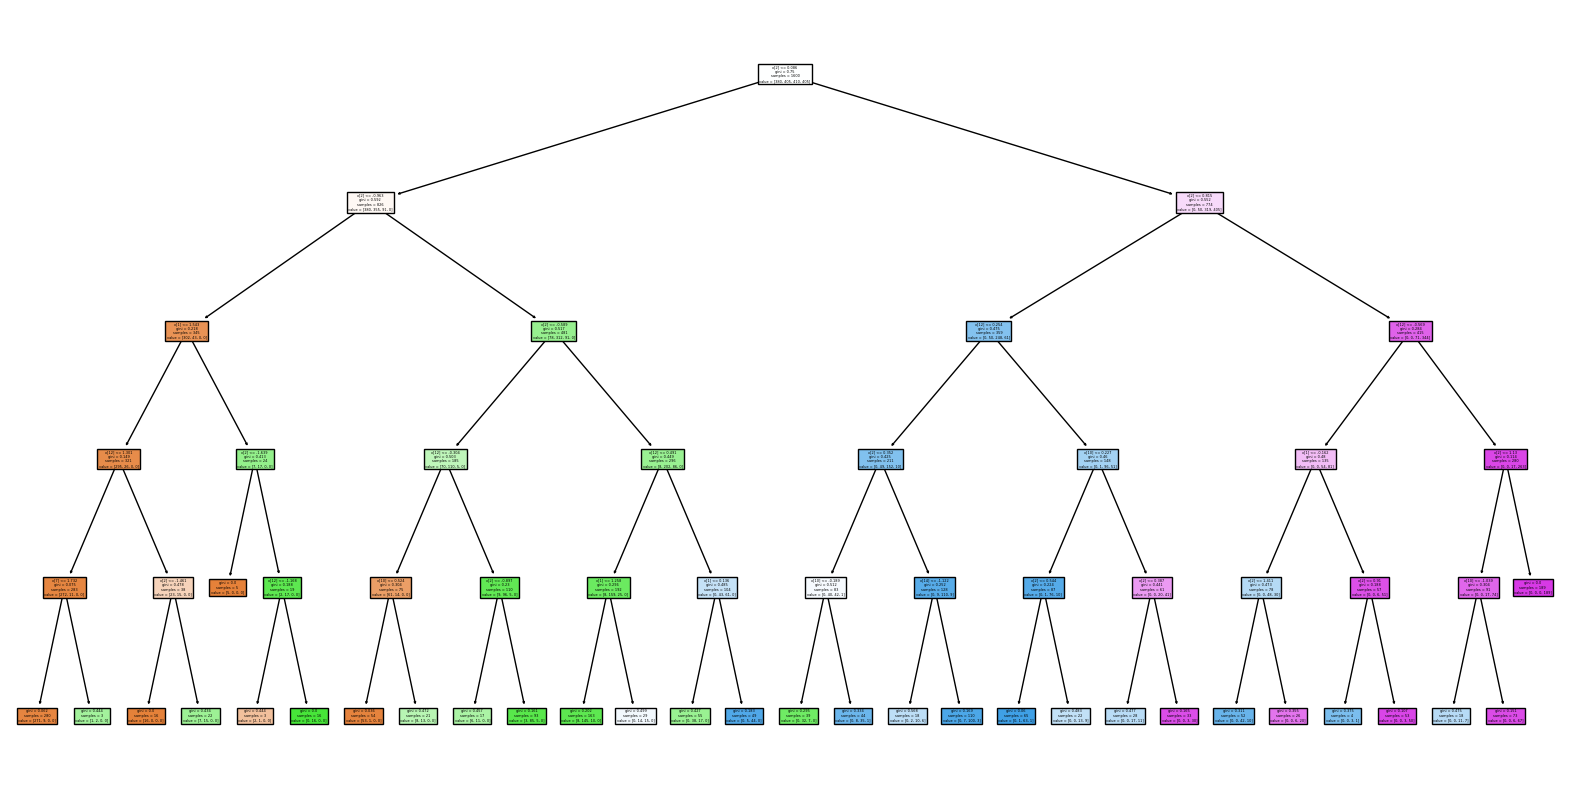

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree_clf_f=DecisionTreeClassifier(max_depth =5)

train_model(tree_clf_f,X_train_f,y_train_f,X_val_f,y_val_f)
plt.figure(figsize=(20,10))
plot_tree(tree_clf_f, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       120
           1       0.72      0.83      0.77        95
           2       0.78      0.81      0.80        90
           3       0.91      0.89      0.90        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



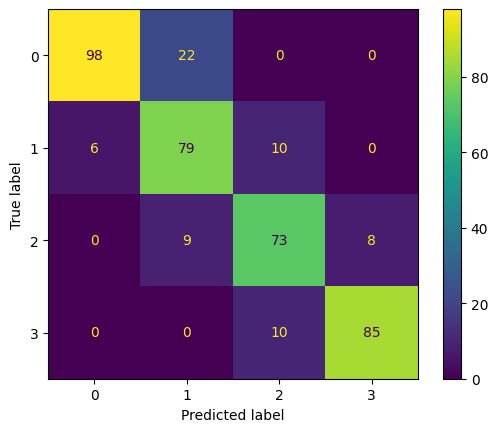

In [40]:
evaluate_model(tree_clf_f,X_val_f,y_val_f)

### 3.4 Random Forest

---RandomForestClassifier(max_depth=8)---
Training accuracy 99.25%
Training accuracy 84.75%
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       120
           1       0.77      0.82      0.80        95
           2       0.75      0.74      0.75        90
           3       0.88      0.91      0.89        95

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



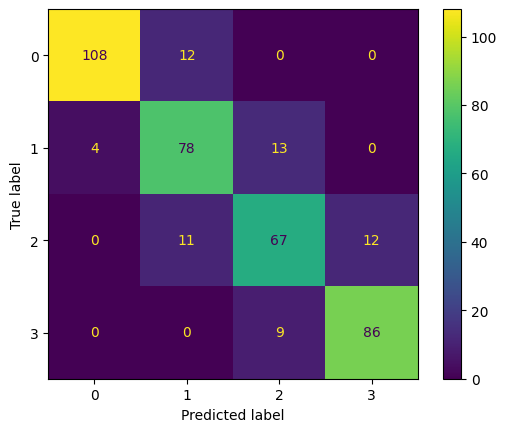

In [41]:
from sklearn.ensemble import RandomForestClassifier #Random Forest



forest_clf_f = RandomForestClassifier( max_depth=8, n_estimators=100)
train_model(forest_clf_f,X_train_f,y_train_f,X_val_f,y_val_f)
evaluate_model(forest_clf_f,X_val_f,y_val_f)

### 3.5 Logistic Regression

---LogisticRegression(solver='liblinear')---
Training accuracy 85.3125%
Training accuracy 83.0%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       120
           1       0.73      0.67      0.70        95
           2       0.67      0.63      0.65        90
           3       0.89      0.98      0.93        95

    accuracy                           0.83       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.83      0.83       400



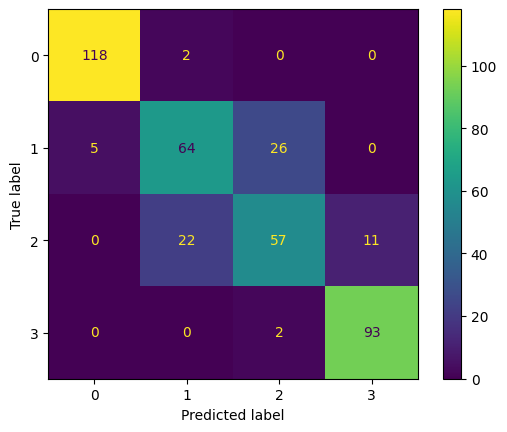

In [42]:
from sklearn.linear_model import LogisticRegression


# create an instance of LogisticRegression class
log_clf_f = LogisticRegression(solver='liblinear')
train_model(log_clf_f,X_train_f,y_train_f,X_val_f,y_val_f)
evaluate_model(log_clf_f,X_val_f,y_val_f)

### 3.6 Hyperparameter tuning using Randomized Seacrch

In [43]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


svm_parameters = {
    'C': np.logspace(-2, 2, 500),
    'kernel': ['linear', 'rbf', 'poly'],  # Changed 'polynomial' to 'poly'
    'gamma': np.logspace(-3, 3, 500),
    'degree': np.arange(1,9),  # Specify the degree for the polynomial kernel
    "probability": [True]
}


random_svm_f = SVC()

# Use RandomizedSearchCV to search for best hyperparameters
clf_f = RandomizedSearchCV(random_svm_f, svm_parameters, random_state=21,
                         refit = True, cv=3,  verbose=3,n_iter=400,n_jobs=-1)
search = clf_f.fit(X_train_f, y_train_f)
search.best_params_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
CPU times: user 10.1 s, sys: 1.65 s, total: 11.8 s
Wall time: 9min 42s


{'probability': True,
 'kernel': 'poly',
 'gamma': 448.025367982949,
 'degree': 1,
 'C': 0.011807128466661904}

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.94      0.95        95
           2       0.93      0.93      0.93        90
           3       0.96      0.99      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



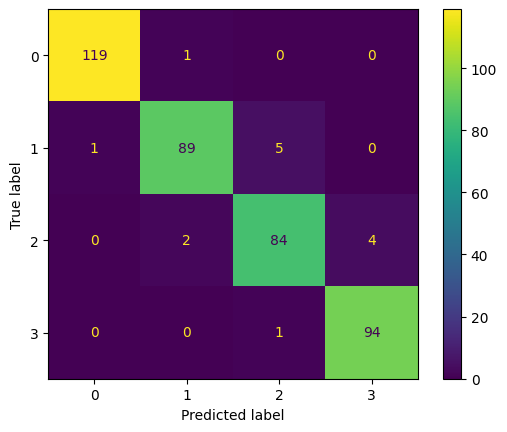

In [44]:
evaluate_model(clf_f.best_estimator_,X_val_f,y_val_f)


### 3.7 Hyperparameter tuning using Grid Search

In [45]:
%%time
from sklearn.model_selection import GridSearchCV


grid_params = {
    'C': np.logspace(1.7, 2, 10),
    'gamma': np.logspace(1.9, 2, 10),
    'degree': [2,3, 4] # Specify the degree for the polynomial kernel
}


grid_clf_f = GridSearchCV(SVC(probability=True,kernel="linear"), grid_params, cv = 3, scoring='accuracy',verbose=3,n_jobs=-1)

grid_clf_f.fit(X_train_f, y_train_f)

print(grid_clf_f.best_params_)

print(grid_clf_f.best_score_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'C': 92.61187281287937, 'degree': 2, 'gamma': 79.43282347242814}
0.9512452773620216
CPU times: user 11.6 s, sys: 1.91 s, total: 13.5 s
Wall time: 13min 21s


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       0.98      0.95      0.96        95
           2       0.93      0.92      0.93        90
           3       0.95      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



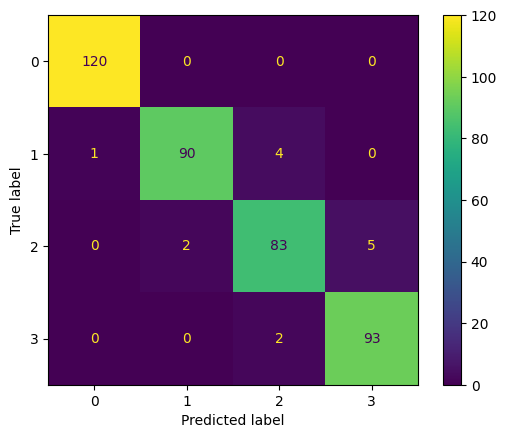

In [46]:
evaluate_model(grid_clf_f.best_estimator_,X_val_f,y_val_f)

### 3.8 Conclusion:
Since the added features did not have any effect on the accuracy for the test the following will be done

1. The hyperparamters that were found in section 3.8 will be used to train a new model

2. The training set will be downloaded and a `price_range` column will be added

## Section 4 Infrence

### 4.1 Building a final model


---SVC(C=58.434141337351754, degree=2, gamma=79.43282347242814, kernel='linear',
    probability=True)---
Training accuracy 99.0%
Training accuracy 96.0%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.96      0.96      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



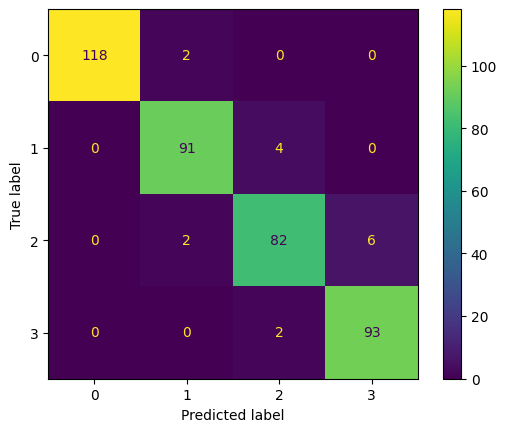

In [123]:
model = SVC(**grid_clf.best_params_)
train_model(model,X_train,y_train,X_val,y_val)
evaluate_model(model,X_val,y_val)

In [111]:
!gdown https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/edit#gid=2082460844 -O test.xlsx

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/edit#gid=2082460844
From (redirected): https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/export?format=xlsx
To: /content/test.xlsx
92.7kB [00:00, 83.6MB/s]


### 4.2 Saving

Now that the model has been trained the following will be saved :
1. The test set with label added as a CSV file    
2. The SVM model as a pickle file  
3. The pipline as a pickle file

In [124]:
test_df = pd.read_excel("test.xlsx")
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [125]:
X_test = test_df.drop("id",axis=1)
X_test = X_test[list(X.columns)]

X_test = preprocessor.transform(X_test)
y_test_preds = model.predict(X_test)
test_df["price_range"] = y_test_preds
test_df.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


In [126]:
import pickle


def save_pickle(var, path):
    with open(path, 'wb') as handle:
        pickle.dump(var, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [129]:
save_pickle(model,"/content/svm_model.pkl")
save_pickle(preprocessor,"/content/pipeline.pkl")

In [130]:
test_df.to_csv("data.csv",index=False)